# Yesterday’s problems

As much as I'm able and have time for, I'll do my best to run dwon answers to problems that were left unsolved each day

## Clearing color from the 'spines'

Someone had trouble clearing the color from the spines whilst using the `setp()` method. The offending code is below.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[None, None, None, None]

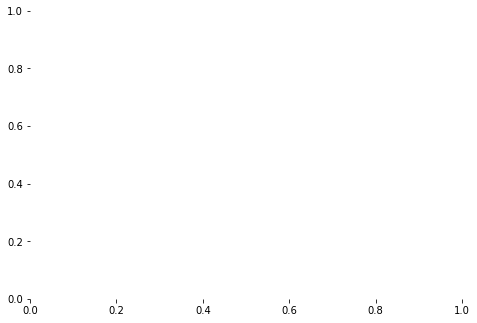

In [4]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.setp(ax.spines.values(), color=None)

ax.spines is an `OrderedDict`. `values()` returns a list of the four spine objects. `setp()` maps the value of each `kwarg` to the properties of those objects represented by the `kwarg`'s keys. I'm not 100% certain what was causing problems, since I can run this code in python2 and python3 and it works fine in each. There are several ways to simplify the 'fix' I came up with in class---which involved accessing each spine individually using its key in the `odict`---for instance by using `map()`.

In [5]:
for x in ['left', 'bottom', 'right', 'top']: 
    ax.spines[x].set_edgecolor('white')

## `color=None` vs `color='white'`

I think now that `color=None` shouldn't be possible and I'm surprised I've been able to get away with it for this long. `matplotlib`'s color spec is here [https://matplotlib.org/api/colors_api.html](https://matplotlib.org/api/colors_api.html). 

There are plenty of ways to spec color (too many if you ask me), but opting out doesn;t appear to be one of them. So while `color=None` appears to work for [`ax.spine`](https://matplotlib.org/api/spines_api.html) objects, it doesn't work for `ax.get_xticklines()` which are instances of [`Line2D`](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html) objects. 

For consistency, we should avoid using `None` and I'll try to do that from here on out.

## Trouble with ASCII vs. Unicode

python3 defaults to Unicode strings. python2 assumes ASCII. So my original `names` list won't work in python2. You can either remove the offending characters:

In [6]:
names_unicode = ['Réunion', 'Hawai‘i']
names_ascii = ['Reunion', 'Hawai\'i']

Or you can force them to become Unicode strings:

In [7]:
names_unicode = [u'Réunion', u'Hawai‘i']

The same applies to titles and captions:

In [8]:
# Since I use an en dash instead of a hyphen between dates, 
# this is not a valid ASCII string and needs to be treated as Unicode.
fig.suptitle(u'Total shark attacks by area (2005–2014)', 
             x=.05, horizontalalignment='left')

Text(0.05,0.98,'Total shark attacks by area (2005–2014)')

## Onwards and upwards

Yesterday's code is below. Many of you have probably made significant improvements already. We'll start today by exploring color.


In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([
    [17, 21, 31, 28, 19, 14, 11, 27, 23, 28],
    [10,  7, 12, 10, 22, 14, 13, 14, 10, 11],
    [ 4,  3,  7,  1,  3,  4,  3, 10, 13,  7],
    [ 5,  4,  5,  2,  0,  4,  2,  5,  6,  5],
    [ 3,  1,  4,  2,  4,  4,  3,  5,  1,  4],
    [ 2,  1,  2,  3,  1,  5,  4,  2,  1,  4],
    [ 4,  4,  2,  0,  6,  8,  5,  4,  5,  2],
    [ 0,  2,  1,  0,  0,  1,  4,  4,  5,  1],
    [ 1,  3,  0,  0,  0,  2,  0,  0,  0,  0],
    [ 1,  2,  0,  3,  1,  1,  2,  0,  1,  0],
])

names = [
    'Florida', 'Australia', 'Hawai‘i', 'S Carolina', 'California & N Carolina',
    '', 'S Africa', 'Réunion Islands', 'Brazil & Bahamas', '',
]

colors = [
    '#8a1513', '#c32828', '#f47c27', '#f7b815', '#cfdeee', '#cfdeee', '#5e8eca',
    '#2a5592', '#1c3666', '#1c3666',
]

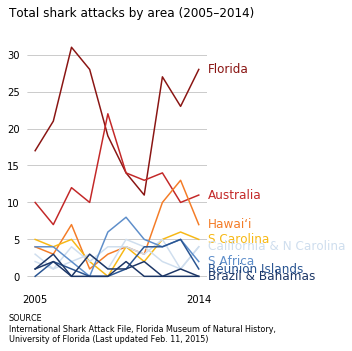

In [10]:
fig = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig.add_axes([.1, .2, 0.5, .7])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
fig.suptitle('Total shark attacks by area (2005–2014)', 
             x=.05, horizontalalignment='left')
fig.text(.05, .05, 'SOURCE\nInternational Shark Attack File, '
                   'Florida Museum of Natural History,\n'
                   'University of Florida (Last updated Feb. 11, 2015)', 
         fontsize=8)
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i], color=colors[i])
    ax.text(2014.5, data[i][-1], names[i], fontsize=12, color=colors[i],
            verticalalignment='center')
plt.show()

Because I'm tired of looking at it over and over, I'm going to store the strings used in the chart as variables:

In [11]:
title = 'Total shark attacks by area (2005–2014)'
citation = 'SOURCE\nInternational Shark Attack File, ' \
          'Florida Museum of Natural History,\n' \
          'University of Florida (Last updated Feb. 11, 2015)'

We specified the color of the original in a list. Instead, let's use `matplotlib`'s `colormap` feature. 

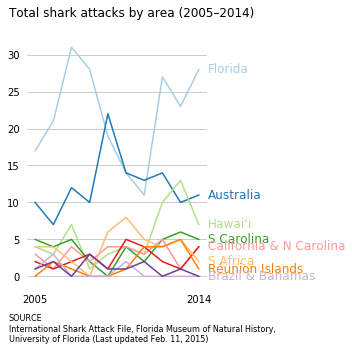

In [12]:
fig = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig.add_axes([.1, .2, 0.5, .7])
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
plt.setp(ax.spines.values(), color=None)
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
plt.xticks([2005, 2014])
fig.suptitle(title, x=.05, horizontalalignment='left')
fig.text(.05, .05, citation, fontsize=8)
for i in range(len(data)):
    ax.plot(np.arange(2005, 2015), data[i],  
            color=plt.get_cmap('Paired')(i))
    ax.text(2014.5, data[i][-1], names[i], fontsize=12, 
            color=plt.get_cmap('Paired')(i),
            verticalalignment='center')
plt.show()

Or we can generate another static color palette using [colorbrewer2.org](colorbrewer2.org). Here's a typical 10-hue qualitative color palette: [http://colorbrewer2.org/?type=qualitative&scheme=Paired&n=10](http://colorbrewer2.org/?type=qualitative&scheme=Paired&n=10).

In [13]:
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
          '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']

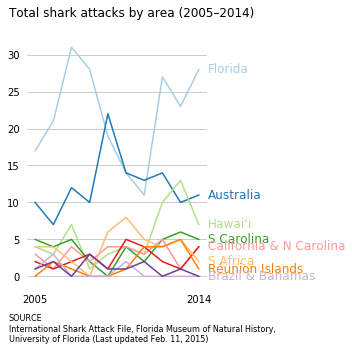

In [14]:
def lines():
    fig = plt.figure(figsize=(5, 5), facecolor='white')
    ax = fig.add_axes([.1, .2, 0.5, .7])
    ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
    plt.setp(ax.spines.values(), color=None)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
    plt.xticks([2005, 2014])
    fig.suptitle(title, x=.05, horizontalalignment='left')
    fig.text(.05, .05, citation, fontsize=8)
    for i in range(len(data)):
        ax.plot(np.arange(2005, 2015), data[i], color=colors[i])
        ax.text(2014.5, data[i][-1], names[i], fontsize=12, color=colors[i],
                verticalalignment='center')
    plt.show()
    
    
lines()

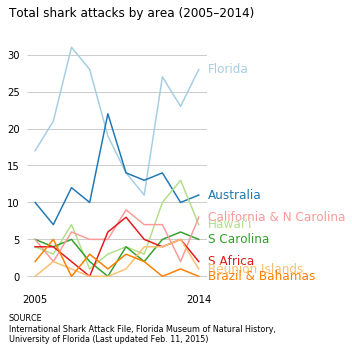

In [26]:
def colorb(i):
    colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
              '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
    return colors[i % len(colors)]


def colorm(cm='Paired'):
    def f(i):
        return plt.get_cmap(cm)(i)
    return f
    

def lines():
    fig = plt.figure(figsize=(5, 5), facecolor='white')
    ax = fig.add_axes([.1, .2, 0.5, .7])
    ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
    plt.setp(ax.spines.values(), color=None)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
    plt.xticks([2005, 2014])
    fig.suptitle(title, x=.05, horizontalalignment='left')
    fig.text(.05, .05, citation, fontsize=8)
    return fig, ax
    
    
fig, ax = lines()
for i in range(len(data)):
        ax.plot(np.arange(2005, 2015), data[i], 
                color=colorm('Paired')(i),)
        ax.text(2014.5, data[i][-1], names[i], fontsize=12, 
                color=colorm('Paired')(i),
                verticalalignment='center')
plt.show()

The 'Paired' colormap is a qualitative colormap. The argument you're passing to the colormap is the index or position of the item you're coloring. If you're using a sequential map, you pass a value between 0 and 1. Eg:

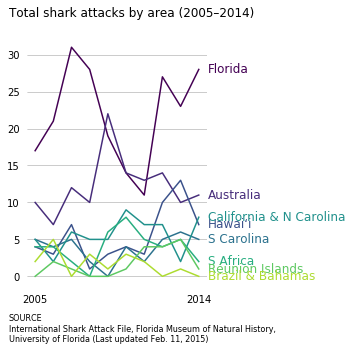

In [27]:
fig, ax = lines()
for i in range(len(data)):
        ax.plot(np.arange(2005, 2015), data[i], 
                color=colorm('viridis')(i/len(data)),)
        ax.text(2014.5, data[i][-1], names[i], fontsize=12, 
                color=colorm('viridis')(i/len(data)),
                verticalalignment='center')
plt.show()

It's also possible to make your own `colormap` objects, but that's way beyond what's necessary. However, if you have a specific color palette that you really like, and that you think you'll use time and time again, a custom `colormap` does offer some convenience.

No doubt you'll have noticed that labels no longer match the colors of the lines.  Perhaps it's time to finally rethink the actual organization of the data. Let's combine Brazil & Bahamas and Callifornia & N Carolina.

In [17]:
# Sum data for California and N Carolina
data[4] += data[5]
# Sum data for Brazil & Bahamas
data[8] += data[9]
# Remove the unused arrays with a mask. Alternatively you could use 
# `np.delete()
mask = np.ones(len(data), dtype=bool)
mask[[5, 9]] = False
data = data[mask]
# Delete the empty strings from the `names` list. 
del names[5]
del names[-1]

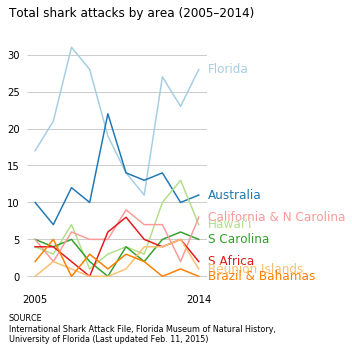

In [18]:
fig, ax = lines()
for i in range(len(data)):
        ax.plot(np.arange(2005, 2015), data[i], 
                color=colorb(i),)
        ax.text(2014.5, data[i][-1], names[i], fontsize=12, 
                color=colorb(i),
                verticalalignment='center')
plt.show()


But we've already discussed the fact that a line plot is really not the right type of visualization for this data. It suggests that we know more than we do (which is a sin when it comes to dataviz). And it creates more noise than is necessary. So let's use a bar graph instead. We'll start my graphing only Florida.

<function matplotlib.pyplot.show(*args, **kw)>

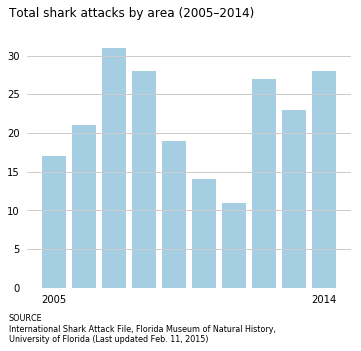

In [19]:
def bar(title=title, citation=citation, figsize=(5, 5)):
    fig = plt.figure(figsize=figsize, facecolor='white')
    ax = fig.add_axes([.1, .2, 0.9, .7])
    ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
    plt.setp(ax.spines.values(), color=None)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
    plt.xticks([2005, 2014])
    fig.suptitle(title, x=.05, horizontalalignment='left')
    fig.text(.05, .05, citation, fontsize=8)
    # Iterate only through the first row of the data
    return fig, ax
  
fig, ax = bar()
for i in range(len(data[0])):
    ax.bar(i+2005, data[0][i], color=colorb(0))
plt.show

But this doesn't tell the story at all, so let's make a grouped bar chart. 

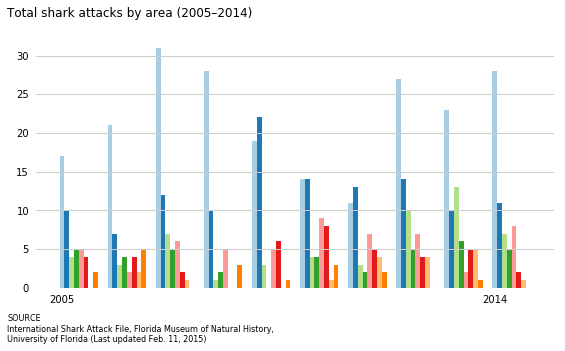

In [20]:
fig, ax = bar(figsize=(8, 5))
# We have 8 regions (we started with 10, but summed two 
# pairs above). So each bar needs to be at most one eighth 
# the width of an entire bar in the chart. I'll make mine 
# 0.1 so that there's a little space between groups of bars.
bar_width = .1
for i in range(len(data)):
    # Each bar in each group needs a slight x offset so they 
    # don't sit atop one anotherwhich we can calulate as we 
    # iterate (see the first argument to `ax.bar()`
    ax.bar(np.arange(2005, 2015)+(i*bar_width), data[i], 
           color=colorb(i), width=bar_width)
plt.show()


Maybe the Florida sharks were travelling to Australia to escape the especially cold winter of 2010? Hmmmm.

I told you I was going to finish this last night, not right before class. But I lied. It'll happen again I'm sure. I haven't yet had my coffee, so let's try this next graph for shits and giggles. We'll plot a stacked bar graph showing the percentages of total shark attacks belonging to each region.

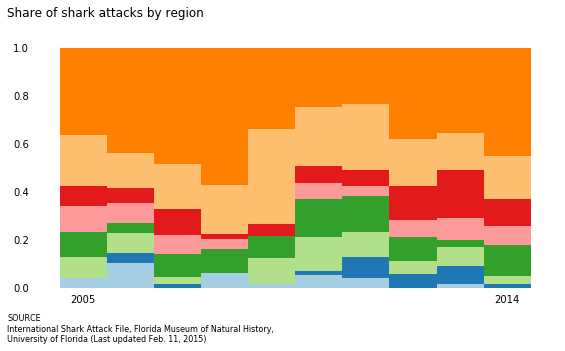

In [21]:
# A little `numpy`. If this doesn;t make sense, please ask me 
# about it in class. 
data2 = data.copy()
sums = data2.sum(axis=0)
data2 = (data2 / sums)[::-1]
    

fig, ax = bar(title=u'Share of shark attacks by region', figsize=(8, 5))
# Turn of grid for this
ax.yaxis.grid(False)
# No space between bars
bar_width = 1
# We need to declare the position of the bottom edge of
# each bar, starting at 0.
bottom = np.zeros(len(data[0])) 
for i in range(len(data2)):
    # Add the value of each preceding bar as we plot them
    bottom = bottom if i == 0 else bottom+data2[i-1]
    ax.bar(np.arange(2005, 2015), data2[i], 
           color=colorb(i), width=bar_width, bottom=bottom)
plt.show()


That's terrible. I'll never be able to unsee it. This is what you get when you don't come up with plan before you write your `matplotlib` code.

For next class, try the following:

0. If you haven't already cleaned or normalized the data in some way, shape, or form---do that.
1. Make a better stacked bar chart.
2. Add legends to the grouped and stacked bar charts. See the `matplotlib` docs here: [matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)
3. Make a box and whisker plot of this data. Again the `matplotlib` docs will get you started: [matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [33]:
names

['Florida',
 'Australia',
 'Hawai‘i',
 'S Carolina',
 'California & N Carolina',
 'S Africa',
 'Réunion Islands',
 'Brazil & Bahamas']

In [29]:
def new_bar(title=title, citation=citation, figsize=(5, 5)):
    fig = plt.figure(figsize=figsize, facecolor='white')
    ax = fig.add_axes([.1, .2, 0.9, .7])
    plt.setp(ax.spines.values(), color=None)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
    plt.xticks([2005, 2014])
    fig.suptitle(title, x=.05, horizontalalignment='left')
    fig.text(.05, .05, citation, fontsize=8)
    plt.legend()
    # Iterate only through the first row of the data
    return fig, ax


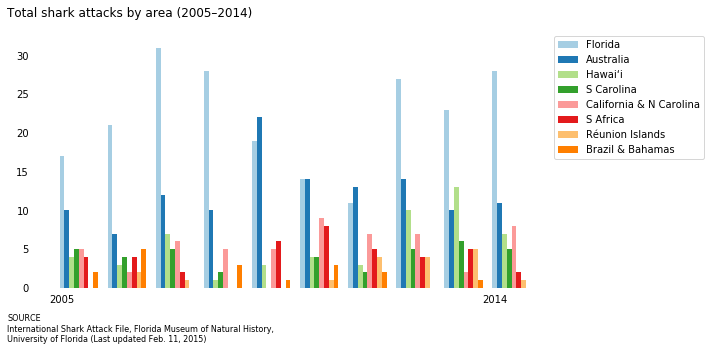

In [37]:
fig, ax = new_bar(figsize=(8, 5))

bar_width = .1
for i in range(len(data)):
    # Each bar in each group needs a slight x offset so they 
    # don't sit atop one anotherwhich we can calulate as we 
    # iterate (see the first argument to `ax.bar()`
    ax.bar(np.arange(2005, 2015)+(i*bar_width), data[i], 
           color=colorb(i), width=bar_width, label=names[i])
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


In [44]:
df = pd.DataFrame(data, columns=list(np.arange(2005, 2015)),index=names)
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Florida,17,21,31,28,19,14,11,27,23,28
Australia,10,7,12,10,22,14,13,14,10,11
Hawai‘i,4,3,7,1,3,4,3,10,13,7
S Carolina,5,4,5,2,0,4,2,5,6,5
California & N Carolina,5,2,6,5,5,9,7,7,2,8
S Africa,4,4,2,0,6,8,5,4,5,2
Réunion Islands,0,2,1,0,0,1,4,4,5,1
Brazil & Bahamas,2,5,0,3,1,3,2,0,1,0


In [52]:
df = df.transpose().reset_index()

In [56]:
df_melted = pd.melt(df, id_vars=['index', ], var_name='region', value_name='attacks')

In [57]:
df_melted.columns = ['year', 'region', 'attacks']

In [77]:
def boxes(title=title, citation=citation, xaxis='Region', yaxis='Yearly Attacks', figsize=(5, 5)):
    fig = plt.figure(figsize=figsize, facecolor='white')
    ax = fig.add_axes([.1, .2, 0.9, .7])
    plt.setp(ax.spines.values(), color=None)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
    plt.xticks([2005, 2014])
    fig.suptitle(title, x=.05, horizontalalignment='left')
    fig.text(.05, .05, citation, fontsize=8)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    # Iterate only through the first row of the data
    return fig, ax

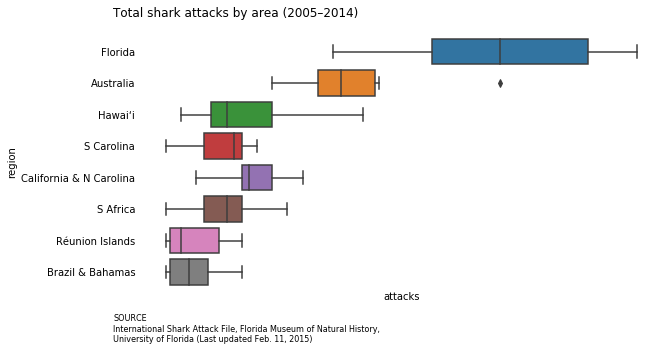

In [78]:
fig, ax = boxes(figsize=(8, 5), xaxis='Region', yaxis='Yearly Attacks')
sns.boxplot(y='region', x='attacks', data=df_melted)

In [81]:
orig_data = np.array([
    [17, 21, 31, 28, 19, 14, 11, 27, 23, 28],
    [10,  7, 12, 10, 22, 14, 13, 14, 10, 11],
    [ 4,  3,  7,  1,  3,  4,  3, 10, 13,  7],
    [ 5,  4,  5,  2,  0,  4,  2,  5,  6,  5],
    [ 3,  1,  4,  2,  4,  4,  3,  5,  1,  4],
    [ 2,  1,  2,  3,  1,  5,  4,  2,  1,  4],
    [ 4,  4,  2,  0,  6,  8,  5,  4,  5,  2],
    [ 0,  2,  1,  0,  0,  1,  4,  4,  5,  1],
    [ 1,  3,  0,  0,  0,  2,  0,  0,  0,  0],
    [ 1,  2,  0,  3,  1,  1,  2,  0,  1,  0],
])

orig_names = [
    'Florida', 'Australia', 'Hawai‘i', 'S Carolina', 'California',
    'N Carolina', 'S Africa', 'Réunion Islands', 'Brazil', 'Bahamas',
]


In [83]:
orig_df = pd.DataFrame(orig_data, columns=list(np.arange(2005, 2015)),index=orig_names)
orig_df = orig_df.transpose().reset_index()
orig_df

,index,Florida,Australia,Hawai‘i,S Carolina,California,N Carolina,S Africa,Réunion Islands,Brazil,Bahamas
0,2005,17,10,4,5,3,2,4,0,1,1
1,2006,21,7,3,4,1,1,4,2,3,2
2,2007,31,12,7,5,4,2,2,1,0,0
3,2008,28,10,1,2,2,3,0,0,0,3
4,2009,19,22,3,0,4,1,6,0,0,1
5,2010,14,14,4,4,4,5,8,1,2,1
6,2011,11,13,3,2,3,4,5,4,0,2
7,2012,27,14,10,5,5,2,4,4,0,0
8,2013,23,10,13,6,1,1,5,5,0,1
9,2014,28,11,7,5,4,4,2,1,0,0


In [88]:
orig_df_melted = pd.melt(orig_df, id_vars=['index', ], var_name='region', value_name='attacks')
orig_df_melted.columns = ['Year', 'Region', 'Attacks']
orig_df_melted

,Year,Region,Attacks
0,2005,Florida,17
1,2006,Florida,21
2,2007,Florida,31
3,2008,Florida,28
4,2009,Florida,19
5,2010,Florida,14
6,2011,Florida,11
7,2012,Florida,27
8,2013,Florida,23
9,2014,Florida,28


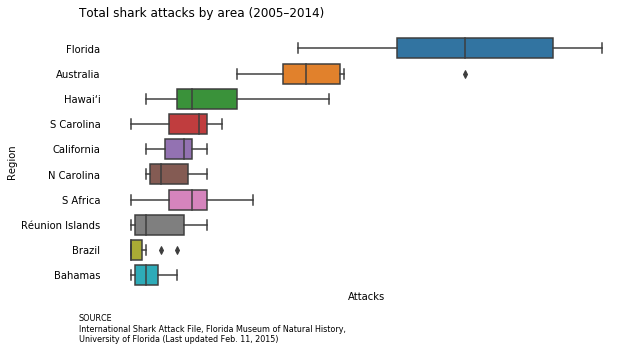

In [94]:
fig, ax = boxes(figsize=(8, 5), xaxis='Region', yaxis='Yearly Attacks')
ax = sns.boxplot(y='Region', x='Attacks', data=orig_df_melted)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'int'

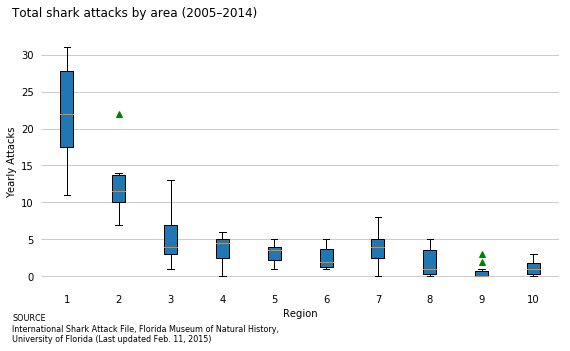

In [131]:
fig, ax = boxes(figsize=(8, 5), xaxis='Region', yaxis='Yearly Attacks')
ax.yaxis.grid(which='major', color='#cccccc', linestyle='-', linewidth=1)
ax = plt.boxplot(orig_data.transpose(), notch=0, sym='g^',vert=1,widths=0.25, patch_artist=1)
# colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow', 'orange', 'blue', 'green', 'red']

for bplot in ax:
    for patch, color in zip(ax['boxes'], colors):
        patch.set_facecolor(color)
plt.show()